In [4]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
from profanity_check import predict, predict_prob
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [7]:
songs = pd.read_csv('../data/songs_after_round_2_cleaning.csv')

# Making Column Flag for Profainity in Song

In [13]:
songs['profain'] = predict(songs['cleaned_lyrics'])

# Making Column for Profain Probabilty (Probability the Lyrics are Profain)

In [16]:
songs['profain_prob'] = predict_prob(songs['cleaned_lyrics'])

# Average Profain Probability by Artist

In [29]:
songs.groupby('artist')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob').head(10)

,artist,profain_prob
40,Hillsong Worship,0.001386
83,MorMor,0.033113
61,Lewis Capaldi,0.058247
18,Chris Stapleton,0.068916
39,Harry Styles,0.071296
110,Surfaces,0.073127
73,Luke Combs,0.077901
81,Miranda Lambert,0.114307
131,​twenty one pilots,0.129396
108,Shawn Mendes,0.157507


In [27]:
songs.groupby('artist')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob').tail(20)

,artist,profain_prob
34,Future,0.999999
63,Lil Durk,1.000000
88,Nicki Minaj,1.000000
94,Polo G,1.000000
42,Internet Money,1.000000
106,Saweetie,1.000000
71,Logic,1.000000
127,YoungBoy Never Broke Again,1.000000
120,Trippie Redd,1.000000
67,Lil Tjay,1.000000


# Average Profain Probability by Gender

In [20]:
songs.groupby('gender')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob')

,gender,profain_prob
2,Non Binary,0.425904
0,Female,0.573250
1,Male,0.705079


# Average Profain Probability by Artist Age

In [22]:
songs.groupby('birth_decade')['profain_prob'].mean().reset_index().sort_values(by = 'profain_prob')

,birth_decade,profain_prob
0,1960s,0.233185
1,1970s,0.451108
2,1980s,0.585469
3,1990s,0.704195
4,2000s,0.725234


In [30]:
songs.head()

,song_name,artist,lyrics,descriptionsong,accepted_annotations,contributors,pageviews,descriptionartist,images_url,followers_count,gender,birth_year,birth_decade,cleaned_lyrics,profain,profain_prob
0,​​rockstar,Post Malone,"[Intro: Post Malone] Hahahahaha Tank God Ayy, ...","On “rockstar,” Post Malone compares his habits...",18.0,440.0,6883347.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4613.0,Male,1995.0,1990s,[intro: post malone] hahahahaha tank god ayy a...,1,1.000000
1,White Iverson,Post Malone,[Intro] Double OT I'm a new three [Chorus] Sau...,"Virtually unknown before this track, Post Malo...",31.0,222.0,4144447.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4613.0,Male,1995.0,1990s,[intro] double ot im a new three [chorus] sauc...,1,1.000000
2,Congratulations,Post Malone,"[Intro: Post Malone] Mm-mmm Yeah, yeah Mm-mmm ...","On “Congratulations,“ Post Malone and Quavo ce...",13.0,221.0,3633318.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4613.0,Male,1995.0,1990s,[intro: post malone] mm_mmm mm_mmm yeah (hey) ...,1,0.998367
3,Psycho,Post Malone,"[Chorus: Post Malone] Damn, my AP goin' psycho...",“Psycho” is the third single from Post Malone’...,21.0,230.0,3080338.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4613.0,Male,1995.0,1990s,[chorus: post malone] damn my ap going psycho ...,1,1.000000
4,I Fall Apart,Post Malone,"[Intro] Ooh, I fall apart Ooh, yeah, mmm, yeah...","On “I Fall Apart,” Post reminisces about a hea...",7.0,126.0,2640350.0,"Austin Richard Post (born July 4, 1995), bette...",https://images.genius.com/1010194fa644be099aa2...,4613.0,Male,1995.0,1990s,[intro] ooh i fall apart ooh yeah mmm yeah [v...,0,0.202692


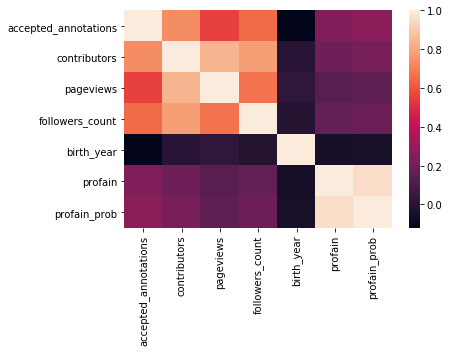

In [36]:
sns.heatmap(songs.corr());